# Data Manipulation with Pandas

In [1]:
# importing
import pandas as pd

## Objects  Series, DataFrame, and Index


In [2]:
import numpy as np
import pandas as pd

### Series

In [3]:
# Series - A Pandas Series is a one-dimensional array of indexed data. It can be created from a list or array as follows:
# pd.Series(data, index=index)
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [4]:
data.values

array([ 0.25,  0.5 ,  0.75,  1.  ])

In [5]:
data.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [6]:
data[1]

0.5

In [7]:
data[1:3]

1    0.50
2    0.75
dtype: float64

In [8]:
#Difference between Numpy array and Pandas Series is that we can use index names instead of just numbers
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                            index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [9]:
data['b']

0.5

In [10]:
#Convert Dictionary to Series
population_dict = {'California': 38332521,
                               'Texas': 26448193,
                               'New York': 19651127,
                               'Florida': 19552860,
                               'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [11]:
#Unlike a dictionary, though, the Series also supports array-style operations such as slicing:
population['California':'Illinois']

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

### Dataframe

In [12]:
#DataFrame as a generalized NumPy array

area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
                 'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

In [13]:
states = pd.DataFrame({'population': population,
                                   'area': area})
states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [14]:
states.index

Index([u'California', u'Florida', u'Illinois', u'New York', u'Texas'], dtype='object')

In [15]:
states.columns

Index([u'area', u'population'], dtype='object')

In [16]:
### From a two-dimensional NumPy array
pd.DataFrame(np.random.rand(3, 2),
                         columns=['foo', 'bar'],
                         index=['a', 'b', 'c'])


,foo,bar
a,0.081163,0.126165
b,0.022218,0.226891
c,0.296198,0.991421


### The Pandas Index Object

In [17]:
# can be thought of either as an immutable array or as an ordered set (technically a multiset, as Index objects may contain repeated values)
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [18]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

indA & indB #intersection

Int64Index([3, 5, 7], dtype='int64')

In [19]:
indA | indB # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [20]:
indA ^ indB # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

### Data Indexing and Selection

In [21]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [22]:
 'a' in data

True

In [23]:
data.keys()

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [24]:
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [25]:
data[0:2]

a    0.25
b    0.50
dtype: float64

In [26]:
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [27]:
data[['a', 'e']]

a    0.25
e     NaN
dtype: float64

In [28]:
#loc vs iloc
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [29]:
data.loc[1]

'a'

In [30]:
data.loc[1:3]

1    a
3    b
dtype: object

In [31]:
#iloc is python style
data.iloc[1]

'b'

In [32]:
data.iloc[1:3]

3    b
5    c
dtype: object

### Data Selection in DataFrame

In [33]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                          'New York': 141297, 'Florida': 170312,
                          'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                         'New York': 19651127, 'Florida': 19552860,
                         'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [34]:
# or data['area']
data.area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [35]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


In [36]:
#Transpose
data.T

,California,Florida,Illinois,New York,Texas
area,423967.000000,170312.000000,149995.000000,141297.000000,695662.00000
pop,38332521.000000,19552860.000000,12882135.000000,19651127.000000,26448193.00000
density,90.413926,114.806121,85.883763,139.076746,38.01874


In [37]:
 data.iloc[:3, :2]

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [38]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [39]:
data.loc[data.density > 100, ['pop', 'density']]


,pop,density
Florida,19552860,114.806121
New York,19651127,139.076746


In [40]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


In [41]:
#ndex‐ ing refers to columns, slicing refers to rows. Slicing:
data[1:3]

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [42]:
data[data.density > 100]

,area,pop,density
Florida,170312,19552860,114.806121
New York,141297,19651127,139.076746


### Operating on Data in Pandas

In [43]:
# Ufuncs: Index Preservation
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [44]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                             columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [45]:
#If we apply a NumPy ufunc on either of these objects, the result will be another Pan‐ das object with the indices preserved:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


In [46]:
#Index alignment in Series


In [47]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                             'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                                   'New York': 19651127}, name='population')

In [48]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [49]:
area.index & population.index

Index([u'California', u'Texas'], dtype='object')

In [50]:
#NaN filled with 0
A = pd.Series([2, 4, 6], index=[0, 1, 2]) 
B = pd.Series([1, 3, 5], index=[1, 2, 3]) 
A+B

0   NaN
1     5
2     9
3   NaN
dtype: float64

In [51]:
A.add(B, fill_value=0)

0    2
1    5
2    9
3    5
dtype: float64

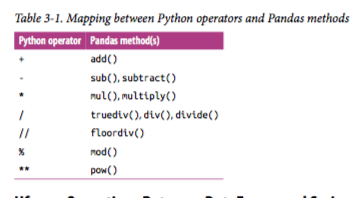

In [52]:
#Ufuncs: Operations Between DataFrame and Series
A = rng.randint(10, size=(3, 4))
A

array([[1, 7, 5, 1],
       [4, 0, 9, 5],
       [8, 0, 9, 2]])

In [53]:
A - A[0]

array([[ 0,  0,  0,  0],
       [ 3, -7,  4,  4],
       [ 7, -7,  4,  1]])

In [54]:
#operations row and column based:
df = pd.DataFrame(A, columns=list('QRST'))
#row
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,3,-7,4,4
2,7,-7,4,1


In [55]:
#column
df.subtract(df['R'], axis=0)


,Q,R,S,T
0,-6,0,-2,-6
1,4,0,9,5
2,8,0,9,2


In [56]:
#Handling Missing Data
# two types: None and NaN

vals1 = np.array([1, None, 3, 4])
vals1
#NOTE the None value above makes the array an object, which slows it down

array([1, None, 3, 4], dtype=object)

In [57]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype


dtype('float64')

In [58]:
#Note : operation with NaN will result in NaN
1 + np.nan

nan

In [59]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [60]:
#NaN provides some aggregation operations
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [61]:
# converting between them where appropriate:
pd.Series([1, np.nan, 2, None])

0     1
1   NaN
2     2
3   NaN
dtype: float64

In [62]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [63]:
x[0] = None
x

0   NaN
1     1
dtype: float64

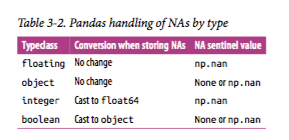

In [64]:
#Operating on Null Values


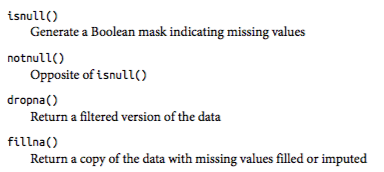

In [65]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [66]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [67]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [68]:
data.dropna()

0        1
2    hello
dtype: object

In [69]:
#For a DataFrame, there are more options. Consider the following DataFrame:
df = pd.DataFrame([[1,      np.nan, 2],
                               [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1,NaN,2
1,2,3,5
2,NaN,4,6


In [70]:
# By default, dropna() will drop all rows in which any null value is present:
df.dropna()

,0,1,2
1,2,3,5


In [71]:
 df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [72]:
df[3] = np.nan
df

,0,1,2,3
0,1,NaN,2,NaN
1,2,3,5,NaN
2,NaN,4,6,NaN


In [73]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1,NaN,2
1,2,3,5
2,NaN,4,6


In [74]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2,3,5,NaN


In [75]:
#Filling Null Values
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a     1
b   NaN
c     2
d   NaN
e     3
dtype: float64

In [76]:
data.fillna(0)

a    1
b    0
c    2
d    0
e    3
dtype: float64

In [77]:
#We can specify a forward-fill to propagate the previous value forward:
data.fillna(method='ffill')

a    1
b    1
c    2
d    2
e    3
dtype: float64

In [78]:
#Or we can specify a back-fill to propagate the next values backward:
data.fillna(method='bfill')

a    1
b    2
c    2
d    3
e    3
dtype: float64

In [79]:
#specify an axis along which the fills take place:
df

,0,1,2,3
0,1,NaN,2,NaN
1,2,3,5,NaN
2,NaN,4,6,NaN


In [80]:
df.fillna(method='ffill', axis=1)


,0,1,2,3
0,1,1,2,2
1,2,3,5,5
2,NaN,4,6,6


## Hierarchical Indexing

In [81]:
#TO DO

## Combining Datasets: Concat and Append

In [82]:
def make_df(cols, ind): 
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] 
            for c in cols}
    return pd.DataFrame(data, ind)

In [83]:
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [84]:
x=[1,2,3] 
y=[4,5,6] 
z=[7,8,9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [85]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [86]:
# Simple Concatenation with pd.concat
 
#pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
#          keys=None, levels=None, names=None, verify_integrity=False,
#          copy=True)
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [87]:
# Also works for dataframes
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])

In [88]:
print(df1); print(df2); print(pd.concat([df1, df2]))


    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [89]:
#One important difference between np.concatenate and pd.concat is that Pandas concatenation preserves indices, even if the result will have duplicate indices! Consider this simple example:

x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])

In [90]:
y.index = x.index # make duplicate indices! 
print(x); print(y); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [91]:
#Catching the repeats as an error. If you’d like to simply verify that the indices in the result of pd.concat() do not overlap, you can specify the verify_integrity flag.
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e: 
    print("ValueError:", e)

('ValueError:', ValueError('Indexes have overlapping values: [0, 1]',))


In [92]:
#Ignoring the index. Sometimes the index itself does not matter, and you would prefer it to simply be ignored. You can specify this option using the ignore_index flag.
print(x); print(y); print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [93]:
#Adding MultiIndex keys.
print(x); print(y); print(pd.concat([x, y], keys=['x', 'y']))


    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


In [94]:
#Concatenation with joins -  DataFrames without shared column names.
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])

#Not all same column names

print(df5); print(df6); 
print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [95]:
pd.concat([df5, df6], join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


In [96]:
pd.concat([df5, df6], join='outer')

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


In [97]:
#Another option is to directly specify the index of the remaining colums using the join_axes argument, which takes a list of index objects.
print(df5); 
print(df6);
print(pd.concat([df5, df6], join_axes=[df5.columns]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


In [98]:
#The append() method - rather than calling pd.concat([df1, df2]), you can simply call df1.append(df2):
# NOTE : Not very efficient!
print(df1); print(df2); 
print(df1.append(df2))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


### Combining Datasets: Merge and Join

In [99]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                        'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]}) 
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [100]:
#Categories of Joins
#One-to-one joins
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [101]:
#Many-to-one joins
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                               'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3); print(df4); print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


In [102]:
#Many-to-many joins
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                                         'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                                      'spreadsheets', 'organization']})
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


In [103]:
#Specication of the Merge Key
print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


In [104]:
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [105]:
#The left_on and right_on keywords
#At times you may wish to merge two datasets with different column names
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'salary': [70000, 80000, 120000, 90000]}) 
print(df1); print(df3);
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [106]:
#The result has a redundant column that we can drop if desired—for example, by using the drop() method of DataFrames:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [107]:
#The left_index and right_index keywords
#Sometimes, rather than merging on a column, you would instead like to merge on an index.
df1a = df1.set_index('employee') 
df2a = df2.set_index('employee') 
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [108]:
print(df1a); print(df2a);
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Lisa      Engineering       2004
Bob        Accounting       2008
Jake      Engineering       2012
Sue                HR       2014


In [109]:
print(df1a); print(df2a); print(df1a.join(df2a))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [110]:
#If you’d like to mix indices and columns, you can combine left_index with right_on or left_on with right_index to get the desired behavior:
print(df1a); print(df3);
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


In [111]:
pd.merge(df1a, df3, left_index=True, right_on='name')

,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


### Aggregation and Grouping

In [112]:
#Simple Aggregation in Pandas
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [113]:
ser.sum()

2.8119254917081569

In [114]:
ser.mean()

0.56238509834163142

In [115]:
#For a DataFrame, by default the aggregates return results within each column
df = pd.DataFrame({'A': rng.rand(5),
                          'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [116]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [117]:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

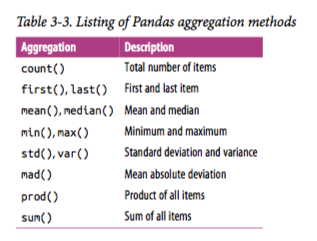

### GroupBy: Split, Apply, Combine

In [118]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                       'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [119]:
df.groupby('key')

In [120]:
 df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [121]:
 df.groupby('key').median()

,data
key,
A,1.5
B,2.5
C,3.5


In [122]:
import seaborn as sns
planets = sns.load_dataset('planets') 
planets.shape
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [123]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [126]:
#Iteration over groups. The GroupBy object supports direct iteration over the groups, returning each group as a Series or DataFrame:
for (method, group) in planets.groupby('method'): 
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [127]:
#Dispatch methods.
planets.groupby('method')['year'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2,2011.500000,2.121320,2010,2010.75,2011.5,2012.25,2013
Eclipse Timing Variations,9,2010.000000,1.414214,2008,2009.00,2010.0,2011.00,2012
Imaging,38,2009.131579,2.781901,2004,2008.00,2009.0,2011.00,2013
Microlensing,23,2009.782609,2.859697,2004,2008.00,2010.0,2012.00,2013
Orbital Brightness Modulation,3,2011.666667,1.154701,2011,2011.00,2011.0,2012.00,2013
Pulsar Timing,5,1998.400000,8.384510,1992,1992.00,1994.0,2003.00,2011
Pulsation Timing Variations,1,2007.000000,NaN,2007,2007.00,2007.0,2007.00,2007
Radial Velocity,553,2007.518987,4.249052,1989,2005.00,2009.0,2011.00,2014
Transit,397,2011.236776,2.077867,2002,2010.00,2012.0,2013.00,2014


In [128]:
# Aggregate,  lter, transform, apply
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
    'data1': range(6),
    'data2': rng.randint(0, 10, 6)},
    columns = ['key', 'data1', 'data2'])

df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [129]:
#Aggregation. We’re now familiar with GroupBy aggregations with sum(), median(), and the like, but the aggregate() method allows for even more flexibility. It can take a string, a function, or a list thereof, and compute all the aggregates at once.

df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [130]:
#Another useful pattern is to pass a dictionary mapping column names to operations to be applied on that column:
df.groupby('key').aggregate({'data1': 'min',
                            'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [131]:
#Filtering - A filtering operation allows you to drop data based on the group proper‐ ties.
def filter_func(x):
    return x['data2'].std() > 4

print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [132]:
#Transformation

df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [133]:
# apply -The apply() method lets you apply an arbitrary function to the group results. The function should take a DataFrame, and return either a Pandas object (e.g., DataFrame, Series) or a scalar

def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum() 
    return x

print(df); print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


In [134]:
#Specifying the split key
L=[0,1,0,1,2,0]
print(df); print(df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


### Pivot Tables

In [135]:
import numpy as np 
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')


In [136]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [137]:
#Pivot Tables by Hand
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [141]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [139]:
#Here is the equivalent to the preceding operation using the pivot_table method of DataFrames:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Working with Time Series

In [142]:
from datetime import datetime 
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [144]:
from dateutil import parser
date = parser.parse("4th of July, 2015") 
date

datetime.datetime(2015, 7, 4, 0, 0)

In [145]:
date.strftime('%A')

'Saturday'

In [150]:
#Pandas Time Series: Indexing by Time
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                        '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64